# Momentum trade model for ETF funds

In [1]:
import yfinance as yf
import pandas as pd

### example, we pick a well known S&P 500 ETF fund

In [2]:
data = yf.download("VOO", period='12mo')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-16,355.540009,364.260010,354.989990,363.859985,358.099609,5016700
2023-03-17,362.760010,363.790009,358.420013,359.880005,354.182648,5189900
2023-03-20,360.470001,363.579987,359.820007,363.130005,357.381195,3099800
2023-03-21,366.420013,368.410004,364.880005,367.880005,362.056000,4117600
2023-03-22,367.779999,371.220001,361.660004,361.779999,356.052551,4094800
2023-03-23,364.480011,368.290009,360.119995,362.640015,356.898956,4787200
2023-03-24,359.980011,363.630005,357.720001,363.559998,359.277588,3740400
2023-03-27,365.730011,366.429993,363.399994,364.160004,359.870514,4144800
2023-03-28,363.540009,364.200012,361.679993,363.519989,359.238068,2413700


## Problem statement

Given the last 5 days closing price (day1 to day5), if you buy at the opening on the next day (day6) , would you be able to make 3% gain in the next 5 days (day6 to day10) ? i.e., by just looking at the closing price of the last 5 days, should i place a trade on day6 with the hope of getting a 3% return on the next 5 days ? 

###  Create the input data frame. i.e. day1 to day5 dataframe

In [4]:
past_data = pd.DataFrame()

In [5]:
past_data['day1'] = data[['Close']].shift(9,axis=0)
past_data['day2'] = data[['Close']].shift(8,axis=0)
past_data['day3'] = data[['Close']].shift(7,axis=0)
past_data['day4'] = data[['Close']].shift(6,axis=0)
past_data['day5'] = data[['Close']].shift(5,axis=0)
past_data = past_data.reset_index()
past_data = past_data.drop(['Date'],axis=1)
past_data = past_data.drop([0,1,2,3,4,5,6,7,8,9])

In [6]:
past_data.head(10)

,day1,day2,day3,day4,day5
10,359.880005,363.130005,367.880005,361.779999,362.640015
11,363.130005,367.880005,361.779999,362.640015,363.559998
12,367.880005,361.779999,362.640015,363.559998,364.160004
13,361.779999,362.640015,363.559998,364.160004,363.519989
14,362.640015,363.559998,364.160004,363.519989,368.690002
15,363.559998,364.160004,363.519989,368.690002,370.890015
16,364.160004,363.519989,368.690002,370.890015,376.070007
17,363.519989,368.690002,370.890015,376.070007,377.559998
18,368.690002,370.890015,376.070007,377.559998,375.429993
19,370.890015,376.070007,377.559998,375.429993,374.519989


### get the maximum price the stock will reach on day6 to day10

In [7]:
future_data = pd.DataFrame()

In [8]:
future_data['day6'] = data[['High']].shift(4,axis=0)
future_data['day7'] = data[['High']].shift(3,axis=0)
future_data['day8'] = data[['High']].shift(2,axis=0)
future_data['day9'] = data[['High']].shift(1,axis=0)
future_data['day10'] = data[['High']]
future_data = future_data.reset_index()
future_data = future_data.drop(['Date'],axis=1)
future_data = future_data.drop([0,1,2,3,4,5,6,7,8,9])


In [9]:
future_data.head(5)

,day6,day7,day8,day9,day10
10,363.630005,366.429993,364.200012,368.940002,371.480011
11,366.429993,364.200012,368.940002,371.480011,376.339996
12,364.200012,368.940002,371.480011,376.339996,377.910004
13,368.940002,371.480011,376.339996,377.910004,378.399994
14,371.480011,376.339996,377.910004,378.399994,375.420013


In [10]:
next_five_days_max = pd.DataFrame()

In [11]:
next_five_days_max['future_max'] = future_data[["day6", "day7", "day8", "day9", "day10"]].max(axis=1)

### get the opening price of day 6

In [12]:
day6_open = pd.DataFrame()

In [13]:
day6_open['day6_open'] = data[['Open']].shift(4,axis=0)
day6_open = day6_open.reset_index()
day6_open = day6_open.drop(['Date'],axis=1)
day6_open = day6_open.drop([0,1,2,3,4,5,6,7,8,9])

In [14]:
day6_open.head(10)

,day6_open
10,359.980011
11,365.730011
12,363.540009
13,367.399994
14,371.230011
15,371.779999
16,375.600006
17,378.190002
18,374.709991
19,373.670013


### calculate the percentage gain from day6 open to the max from day6 to day10

In [15]:
gain_percent =pd.DataFrame()

In [16]:
next_five_days_max.head()

,future_max
10,371.480011
11,376.339996
12,377.910004
13,378.399994
14,378.399994


In [17]:
gain_percent['gain'] = next_five_days_max['future_max'] - day6_open['day6_open']
gain_percent['gain'] = gain_percent['gain']/day6_open['day6_open']

In [18]:
gain_percent.head()

,gain
10,0.031946
11,0.029010
12,0.039528
13,0.029940
14,0.019314


### this is the output trade or no trade on day6

In [19]:
trade = gain_percent['gain'] > 0.03

In [20]:
trade.head()

10     True
11    False
12     True
13    False
14    False
Name: gain, dtype: bool

## Try to idendify buy opportunities with KNN

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [22]:
X_train, X_test, y_train, y_test = train_test_split(past_data, trade, random_state=42)


In [23]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

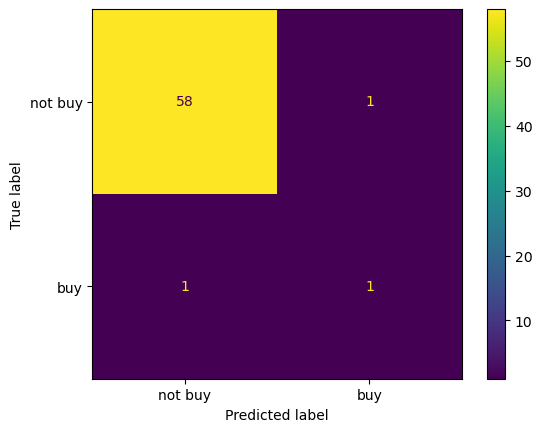

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_preds = knn_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, knn_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


It is quite good in identify true negative, which is important. We should not buy when it is going to loss money. However, false positive nad false negative are same as the true possitive. There should be room for improvement there.

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_pipe = Pipeline([('scale', StandardScaler()), ('log', LogisticRegression())])
log_pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('log', LogisticRegression())])

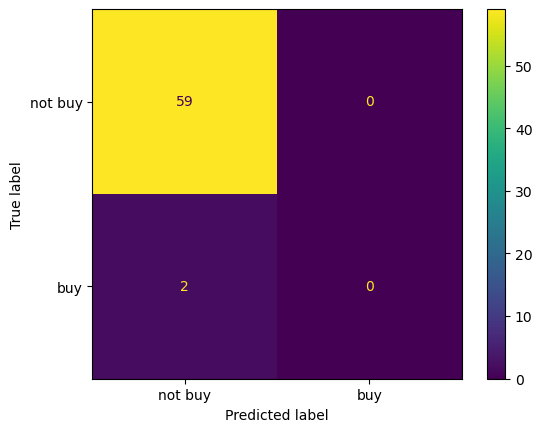

In [27]:
log_preds = log_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


Again, it is doing a good job on filtering out the time that we should not enter the trade, but it seesm that it is worse than KNN as it does not get any true positive right

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
tree_pred = tree_model.predict(X_test)

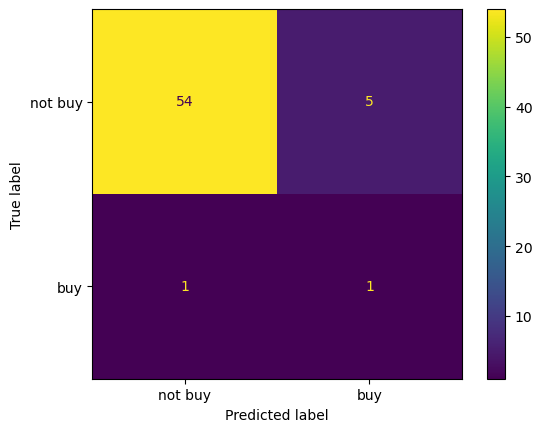

In [30]:
voo_confusion_mat = confusion_matrix(y_test, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


The results is similar to that of KNN, so both are good candidate at this point

## SVM

In [31]:
from sklearn.svm import SVC


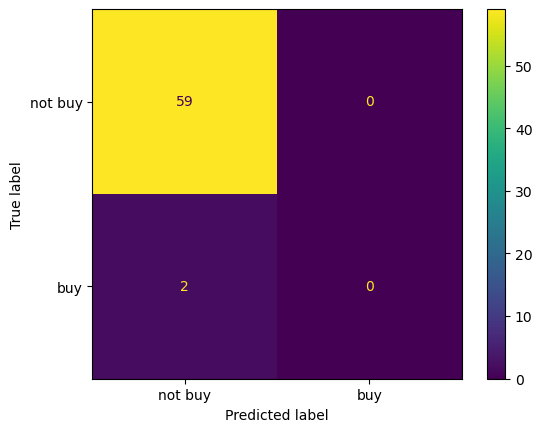

In [32]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()

This also has a similar results compare to logistic regresion. So at this point KNN and Devision trees seems to be more promissing

## We can further improve the models by tuning some parameters

## Improve KNN

In [33]:
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
knn_grid.fit(X_train, y_train)
best_k = knn_grid.best_params_['knn__n_neighbors']


In [34]:
best_k

7

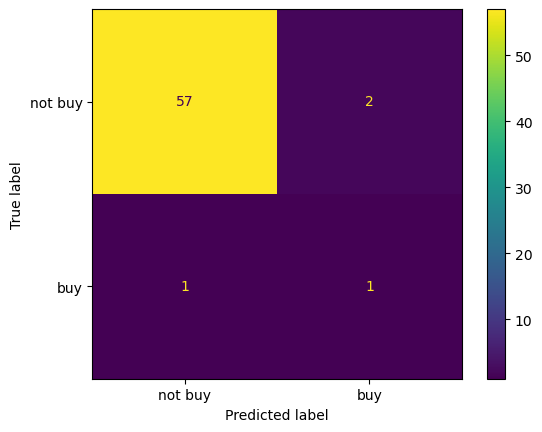

In [35]:
knn_new_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=3))])
knn_new_pipe.fit(X_train, y_train)
knn_new_preds = knn_new_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, knn_new_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()

## Improving Logistic Regression

In [36]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [37]:
import numpy as np

Cs = np.logspace(-2, 2)
coef_list = []

for C in Cs:
    lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = C, random_state=42, max_iter = 1000).fit(scaled_X_train, y_train)
    coef_list.append(list(lgr.coef_[0]))
    print(lgr.coef_)


[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[ 0.          0.          0.          0.         -0.02526184]]
[[ 0.          0.          0.          0.         -0.09934597]]
[[ 0.          0.          0.          0.         -0.16922377]]
[[ 0.          0.          0.          0.         -0.23460414]]
[[ 0.          0.          0.          0.         -0.29521028]]
[[ 0.          0.          0.          0.         -0.35081724]]
[[ 0.          0.          0.          0.         -0.40130862]]
[[ 0.        0.        0.        0.       -0.446683]]
[[ 0.          0.          0.          0.         -0.48711647]]
[[ 0.          0.          0.          0.         -0.52275069]]
[[ 0.          0.          0.          0.         -0.55391874]]
[[ 0.          0.          0.          0.         -0.580971

In [38]:
np.logspace(-2, 2)

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

In [39]:
new_lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.01, random_state=42, max_iter = 1000).fit(scaled_X_train, y_train)


In [40]:
new_log_preds = new_lgr.predict(scaled_X_test)


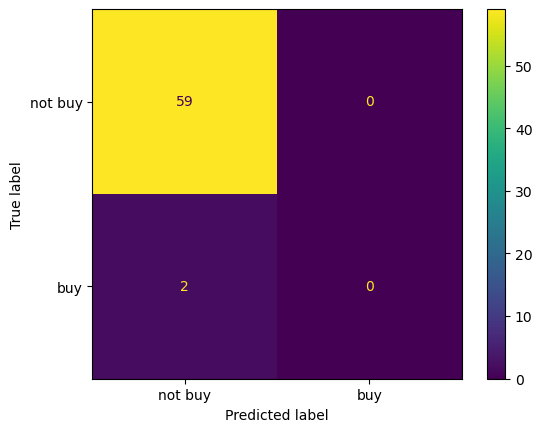

In [41]:
voo_confusion_mat = confusion_matrix(y_test, new_log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


After tuning some parameters, it does not seems like it offer any improvement

## Improving Decision Tree


In [42]:
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}

In [43]:
new_tree_grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)


In [44]:
new_tree_pred = new_tree_grid.predict(X_test)

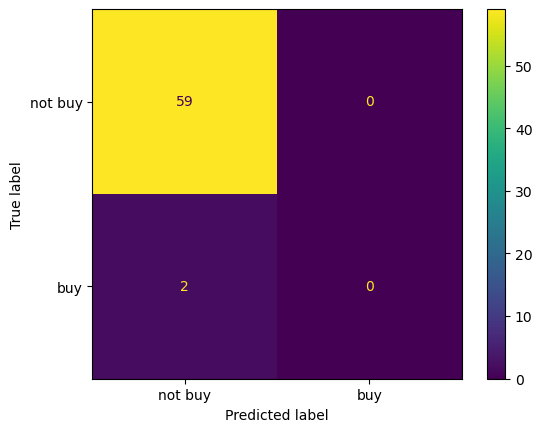

In [45]:
voo_confusion_mat = confusion_matrix(y_test, new_tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


 Also tuning decision tree seems to do even worse

## Improving SVM

In [46]:
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}

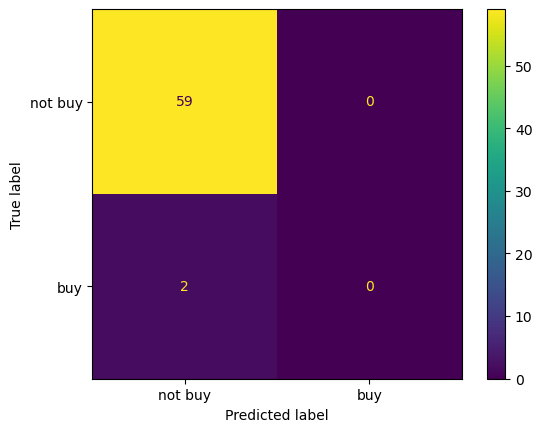

In [47]:
svc_grid = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
svc_grid.fit(X_train, y_train)
svc_new_pred = svc_grid.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, svc_new_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


Unfortunately turning SVM parameters also gives us the same result, so no more further optimizaition can be done.